## Bike Sharing Assignment

### Data Understanding

In [1]:
# Importing all the necessary packages required for data understanding and processing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset into a dataframe

bike = pd.read_csv('day.csv')

In [3]:
# Looking at the first five rows

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the descriptive information

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Shape of the dataframe

bike.shape

(730, 16)

In [6]:
# Verifying if dataframe has any null values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Let's computes a summary of statistics pertaining to the dataframe

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

##### Column Analysis

instant - record index

dteday - date

season, yr, mnth, holiday, weekday, workingday, weathersit - Categorical column

temp, atemp, hum, windspeed, casual, registered, cnt - Numerical column

#### Dropping redundant columns

In [8]:
# Below columns can be removed 
# instant - This is just the reocrd index which has all the unique values
# dteday - This is date column, as we already have year and month value extracted and stored in column 'yr' and 'mnth' respectively we can remove this.
# casual - Count of casual users which contributes to the total count of rental bikes 
# registered - Count of registered users which contributes to the total count of rental bikes 
# cnt = casual + registered

bike = bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

#### Data Visualisation 

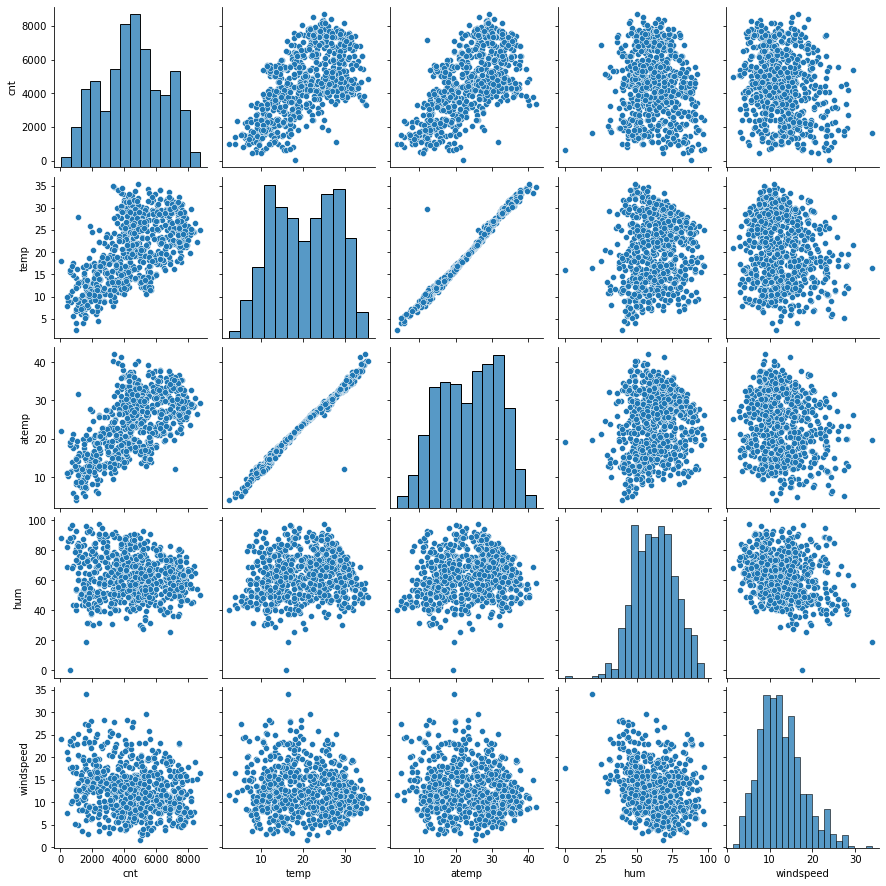

In [9]:
# Pairplot for all the numerical columns 

sns.pairplot(bike[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])

#### Findings: 
1. Above pairplot shows that there is a high correlation between cnt & temp and cnt & atemp variable 
2. temp and atemp variable is almost similar that's why we can see strong correlation between them i.e. close to 1
2. Also there is a small negative correlation between cnt and windspeed 

This can also been seen from correlation matrix below

In [10]:
# Correlation matrix among the numerical variables

bike[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


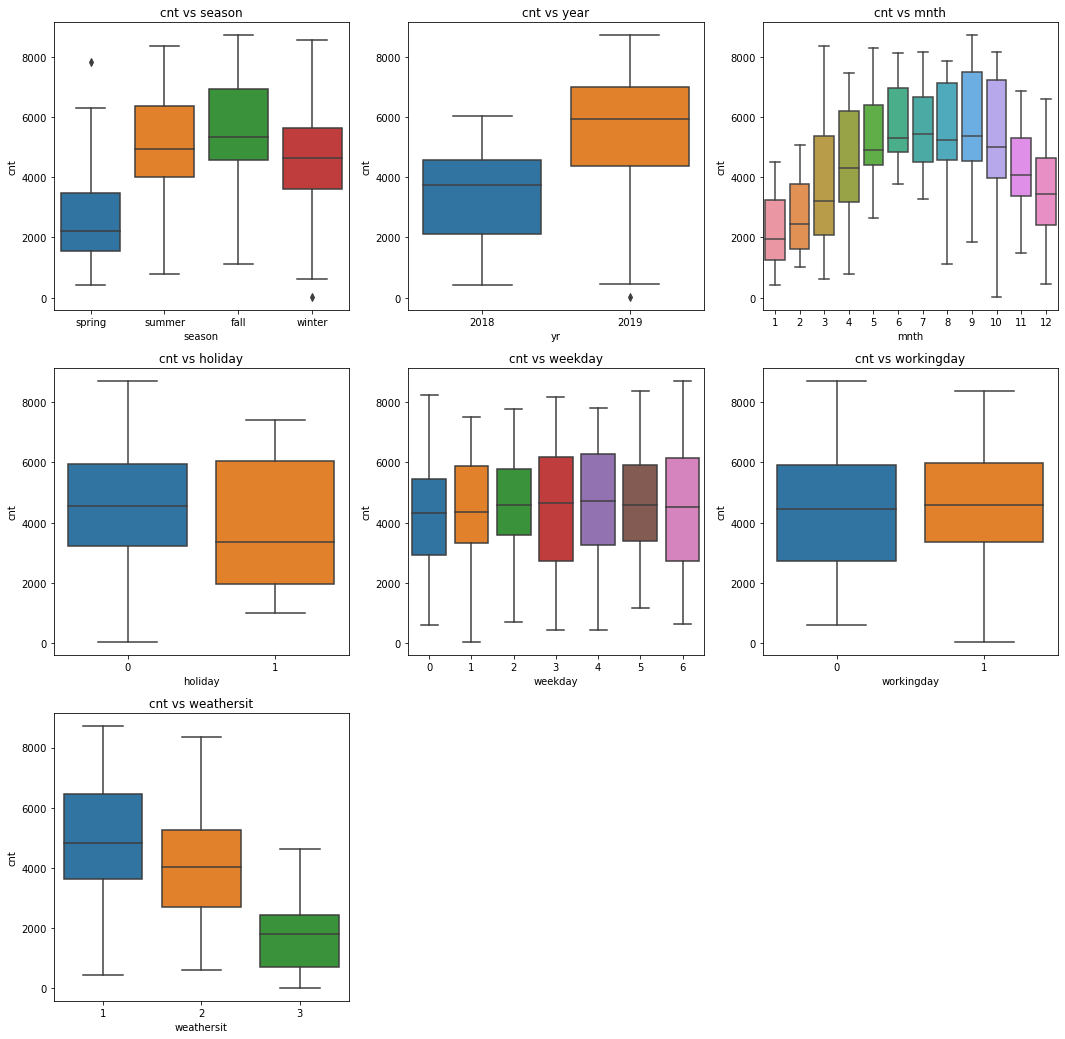

In [11]:
# Boxplot of categorical variable vs target variable

plt.figure(figsize=(18,18))

plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.xticks([0,1,2,3], ['spring', 'summer', 'fall', 'winter'])
plt.title('cnt vs season')

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.xticks([0,1], [2018, 2019])
plt.title('cnt vs year')

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.title('cnt vs mnth')

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.title('cnt vs holiday')

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.title('cnt vs weekday')

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.title('cnt vs workingday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.title('cnt vs weathersit')

plt.show()

**Note**:
1. weathersit_1 - Clear, Few clouds, Partly cloudy, Partly cloudy
2. weathersit_2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. weathersit_3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. weathersit_4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

##### Findings:
**1. cnt vs season** - Demand of shared bike is high during summer and fall season followed by the demand in winter season. Bike sharing chances are less in spring season. This variable can be a good predictor for the target variable.

**2. cnt vs year** - Demand for bike sharing system is increasing every year proving that the column 'yr' might be a good variable for prediction. We may say that it is gaining popularity year by year.

**3. cnt vs mnth** - There is an almost increasing trend of shared bike's demand from the month of Jan to Sep with median between 4000 to 6000 which indicates that it can be a good predictor.

**4. cnt vs holiday** - Large number of bike bookings happened when it is not a holiday.

**5. cnt vs weekday** - weekday variable shows very close trend in the demand of bike sharing. This variable may have no or little influence towards the prediction.

**6. cnt vs workingday** - This variable also shows very close trend in the demand of bike sharing so it may have no or little influence towards the prediction.

**7. cnt vs weathersit** - Large number of bookings for shared bike were happened when weather is clear or with few clouds followed by weathersit_2, this indicates that it can be a good predictor for the target variable.

### Data Preparation

In [12]:
# Creating dummy variables for all the categorical columns
# Excluding variables 'yr', 'holiday' and 'workingday' because this already have binary values

var_list = ['season', 'mnth', 'weekday', 'weathersit']
bike[var_list] = bike[var_list].astype('category')
cat_col = pd.get_dummies(bike[var_list], drop_first=True)
cat_col.head()

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# Concatenating the above dummy categorical column to the original dataframe

bike = pd.concat([bike, cat_col], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [14]:
# Since we already created dummy variables for categorical columns - 'season', 'mnth', 'weekday', 'weathersit' so we can remove it from original dataframe

bike = bike.drop(var_list, axis=1)

In [15]:
# Checking the head of the dataframe

bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


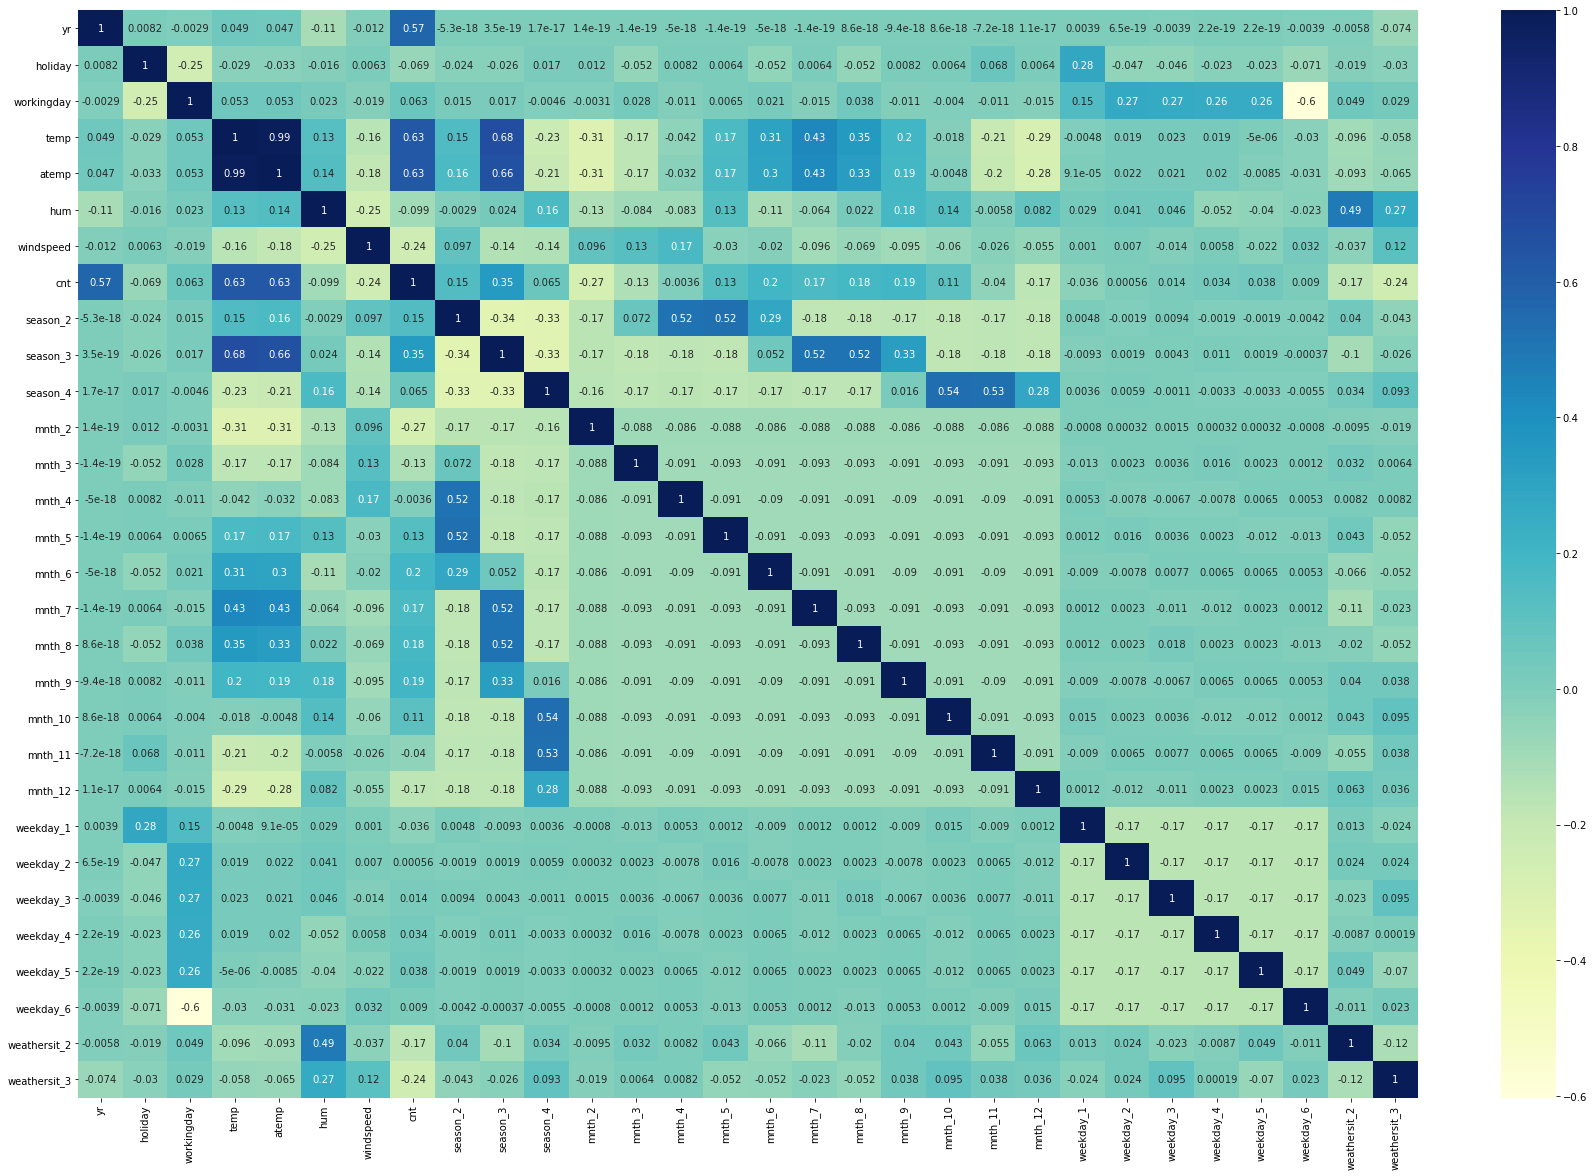

In [16]:
# Checking the correlation with the help of heatmap

plt.figure(figsize=(30, 20))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [17]:
# Importing the packages necessary for Data processing and modelling

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [18]:
# Splitting the Data into Training and Testing Sets

bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=101)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


#### Feature Scaling

In [19]:
# Taking out the numerical columns except the 'yes-no' and 'dummy' variables for feature scaling 

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [20]:
# Using normalization technique to scale the features so that they end up ranging between 0 and 1

scaler = MinMaxScaler()
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
117,0,0,1,0.695756,0.656133,0.655484,0.615407,0.472987,1,0,...,0,0,0,0,0,1,0,0,1,0
712,1,0,1,0.277292,0.282377,0.581470,0.224374,0.654987,0,0,...,0,1,0,0,0,0,1,0,0,0
60,0,0,1,0.343747,0.316347,0.334397,0.588452,0.247510,0,0,...,0,0,0,0,1,0,0,0,0,0
72,0,0,1,0.331557,0.332005,0.394939,0.236118,0.237197,0,0,...,0,0,1,0,0,0,0,0,0,0
124,0,0,1,0.498465,0.476286,0.327476,0.562804,0.516934,1,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# Dividing into X and Y sets for the model building

y_train = bike_train.pop('cnt')
X_train = bike_train

### Data Modelling and Evaluation

In [22]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [23]:
# Listing down the features and their corresponding ranking discovered from RFE 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 14),
 ('mnth_3', False, 7),
 ('mnth_4', False, 10),
 ('mnth_5', False, 9),
 ('mnth_6', False, 11),
 ('mnth_7', False, 15),
 ('mnth_8', False, 8),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 6),
 ('weathersit_2', False, 5),
 ('weathersit_3', True, 1)]

In [24]:
# Taking out the columns which RFE has shown a support

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [25]:
# Redetermined the training set based on the RFE columns

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_3
117,0,0,1,0.656133,0.655484,0.615407,1,0,0,0,0,0,1,0,0
712,1,0,1,0.282377,0.581470,0.224374,0,1,0,0,0,0,0,1,0
60,0,0,1,0.316347,0.334397,0.588452,0,0,0,0,0,1,0,0,0
72,0,0,1,0.332005,0.394939,0.236118,0,0,0,1,0,0,0,0,0
124,0,0,1,0.476286,0.327476,0.562804,1,0,0,0,0,0,1,0,0


#### Model 1

In [26]:
# Building the first model 

# Add a constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model and check the OLS regression parameters
lr1 = sm.OLS(y_train, X_train_sm)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.46e-173
Time:                        01:15:05   Log-Likelihood:                 468.57
No. Observations:                 510   AIC:                            -907.1
Df Residuals:                     495   BIC:                            -843.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2175      0.026      8.469      0.000       0.167       0.268
yr               0.2291      0.009     26.006      0.000       0.212       0.246
holiday         -0.0830      0.024     -3.425      0.001      -0.131      -0.035
workingday       0.0188      0.008      2.259      0.024       0.002       0.035
atemp            0.6352      0.022     28.408      0.000       0.591       0.679
hum             -0.2501      0.029     -8.769      0.000      -0.306      -0.194
windspeed       -0.1761      0.030     -5.942      0.000      -0.234      -0.118
season_2         0.0856      0.011      7.758      0.000       0.064       0.107
season_4         0.1437      0.011     12.687      0.000       0.121       0.166
mnth_9           0.1082      0.017      6.424      0.000       0.075       0.141
weekday_1       -0.0249      0.011     -2.342      0.020      -0.046      -0.004
weekday_2       -0.0198      0.012     -1.669      0.096      -0.043       0.004
weekday_3       -0.0056      0.012     -0.469      0.639      -0.029       0.018
weekday_4       -0.0073      0.011     -0.663      0.508      -0.029       0.014
weekday_5       -0.0066      0.012     -0.555      0.579      -0.030       0.017
weathersit_3    -0.1761      0.028     -6.187      0.000      -0.232      -0.120
==============================================================================
Omnibus:                       61.333   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.151
Skew:                          -0.735   Prob(JB):                     1.99e-24
Kurtosis:                       4.725   Cond. No.                     2.34e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,8.29
3,atemp,6.78
5,windspeed,3.79


**Findings**: weekday_3 is insignificant in presence of other variables and it's VIF is also high; can be dropped

In [28]:
# Removing the variable 'weekday_3' based on its High p-value & High VIF

X_train_new = X_train_rfe.drop('weekday_3', axis=1)

#### Model 2

In [29]:
# Rebuilding the model 

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create a regression model and check the OLS regression parameters
lr1 = sm.OLS(y_train, X_train_sm)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.46e-173
Time:                        01:15:28   Log-Likelihood:                 468.57
No. Observations:                 510   AIC:                            -907.1
Df Residuals:                     495   BIC:                            -843.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2175      0.026      8.469      0.000       0.167       0.268
yr               0.2291      0.009     26.006      0.000       0.212       0.246
holiday         -0.0887      0.031     -2.819      0.005      -0.150      -0.027
workingday       0.0132      0.014      0.911      0.363      -0.015       0.042
atemp            0.6352      0.022     28.408      0.000       0.591       0.679
hum             -0.2501      0.029     -8.769      0.000      -0.306      -0.194
windspeed       -0.1761      0.030     -5.942      0.000      -0.234      -0.118
season_2         0.0856      0.011      7.758      0.000       0.064       0.107
season_4         0.1437      0.011     12.687      0.000       0.121       0.166
mnth_9           0.1082      0.017      6.424      0.000       0.075       0.141
weekday_1       -0.0192      0.017     -1.124      0.262      -0.053       0.014
weekday_2       -0.0141      0.017     -0.838      0.402      -0.047       0.019
weekday_4       -0.0016      0.016     -0.101      0.920      -0.034       0.030
weekday_5       -0.0010      0.017     -0.058      0.953      -0.035       0.033
weathersit_3    -0.1761      0.028     -6.187      0.000      -0.232      -0.120
==============================================================================
Omnibus:                       61.333   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.151
Skew:                          -0.735   Prob(JB):                     1.99e-24
Kurtosis:                       4.725   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,8.29
2,workingday,7.32
3,atemp,6.78
5,windspeed,3.79
9,weekday_1,2.25
11,weekday_4,2.23
10,weekday_2,2.06
0,yr,2.01
12,weekday_5,2.01
6,season_2,1.63


**Findings**: weekday_5 is insignificant in presence of other variables since it's p value is very high so it can be dropped

In [31]:
# Removing the variable 'weekday_5' based on its High p-value

X_train_new = X_train_new.drop('weekday_5', axis=1)

#### Model 3

In [32]:
# Rebuilding the model 

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create a regression model and check the OLS regression parameters
lr1 = sm.OLS(y_train, X_train_sm)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.09e-174
Time:                        01:15:45   Log-Likelihood:                 468.57
No. Observations:                 510   AIC:                            -909.1
Df Residuals:                     496   BIC:                            -849.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2175      0.026      8.480      0.000       0.167       0.268
yr               0.2291      0.009     26.032      0.000       0.212       0.246
holiday         -0.0892      0.030     -2.963      0.003      -0.148      -0.030
workingday       0.0127      0.012      1.084      0.279      -0.010       0.036
atemp            0.6352      0.022     28.462      0.000       0.591       0.679
hum             -0.2501      0.028     -8.778      0.000      -0.306      -0.194
windspeed       -0.1760      0.030     -5.948      0.000      -0.234      -0.118
season_2         0.0856      0.011      7.765      0.000       0.064       0.107
season_4         0.1437      0.011     12.705      0.000       0.122       0.166
mnth_9           0.1081      0.017      6.433      0.000       0.075       0.141
weekday_1       -0.0187      0.015     -1.266      0.206      -0.048       0.010
weekday_2       -0.0136      0.015     -0.938      0.348      -0.042       0.015
weekday_4       -0.0011      0.014     -0.082      0.935      -0.028       0.026
weathersit_3    -0.1759      0.028     -6.231      0.000      -0.231      -0.120
==============================================================================
Omnibus:                       61.444   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.470
Skew:                          -0.736   Prob(JB):                     1.69e-24
Kurtosis:                       4.728   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,8.28
3,atemp,6.77
2,workingday,4.70
5,windspeed,3.79
0,yr,2.01
9,weekday_1,1.69
6,season_2,1.63
11,weekday_4,1.62
7,season_4,1.61
10,weekday_2,1.54


**Findings**: weekday_4 is insignificant in presence of other variables since it's p value is very high so it can be dropped

In [34]:
# Removing the variable 'weekday_4' based on its High p-value

X_train_new = X_train_new.drop('weekday_4', axis=1)

#### Model 4

In [35]:
# Rebuilding the model 

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create a regression model and check the OLS regression parameters
lr1 = sm.OLS(y_train, X_train_sm)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          7.84e-176
Time:                        01:15:57   Log-Likelihood:                 468.56
No. Observations:                 510   AIC:                            -911.1
Df Residuals:                     497   BIC:                            -856.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2175      0.026      8.488      0.000       0.167       0.268
yr               0.2291      0.009     26.073      0.000       0.212       0.246
holiday         -0.0897      0.029     -3.045      0.002      -0.148      -0.032
workingday       0.0122      0.010      1.172      0.242      -0.008       0.033
atemp            0.6353      0.022     28.500      0.000       0.591       0.679
hum             -0.2501      0.028     -8.787      0.000      -0.306      -0.194
windspeed       -0.1761      0.030     -5.957      0.000      -0.234      -0.118
season_2         0.0856      0.011      7.773      0.000       0.064       0.107
season_4         0.1437      0.011     12.718      0.000       0.122       0.166
mnth_9           0.1081      0.017      6.444      0.000       0.075       0.141
weekday_1       -0.0183      0.014     -1.328      0.185      -0.045       0.009
weekday_2       -0.0132      0.014     -0.976      0.329      -0.040       0.013
weathersit_3    -0.1757      0.028     -6.244      0.000      -0.231      -0.120
==============================================================================
Omnibus:                       61.463   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.550
Skew:                          -0.736   Prob(JB):                     1.63e-24
Kurtosis:                       4.729   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,8.28
3,atemp,6.77
5,windspeed,3.78
2,workingday,3.71
0,yr,2.01
6,season_2,1.63
7,season_4,1.61
9,weekday_1,1.46
10,weekday_2,1.33
1,holiday,1.25


**Findings**: Variable 'hum' is having high VIF value so it can be dropped

In [37]:
# Removing the variable 'hum' based on its High VIF

X_train_new = X_train_new.drop('hum', axis=1)

#### Model 5

In [38]:
# Rebuilding the model 

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create a regression model and check the OLS regression parameters
lr1 = sm.OLS(y_train, X_train_sm)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.88e-161
Time:                        01:16:23   Log-Likelihood:                 431.74
No. Observations:                 510   AIC:                            -839.5
Df Residuals:                     498   BIC:                            -788.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0670      0.020      3.273      0.001       0.027       0.107
yr               0.2382      0.009     25.425      0.000       0.220       0.257
holiday         -0.0775      0.032     -2.453      0.015      -0.140      -0.015
workingday       0.0159      0.011      1.419      0.157      -0.006       0.038
atemp            0.6165      0.024     25.878      0.000       0.570       0.663
windspeed       -0.0981      0.030     -3.240      0.001      -0.158      -0.039
season_2         0.0738      0.012      6.288      0.000       0.051       0.097
season_4         0.1242      0.012     10.441      0.000       0.101       0.148
mnth_9           0.0824      0.018      4.643      0.000       0.048       0.117
weekday_1       -0.0267      0.015     -1.807      0.071      -0.056       0.002
weekday_2       -0.0164      0.014     -1.135      0.257      -0.045       0.012
weathersit_3    -0.2669      0.028     -9.502      0.000      -0.322      -0.212
==============================================================================
Omnibus:                       61.209   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.482
Skew:                          -0.770   Prob(JB):                     2.50e-22
Kurtosis:                       4.521   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,atemp,4.50
2,workingday,3.60
4,windspeed,3.54
0,yr,2.01
5,season_2,1.61
8,weekday_1,1.46
6,season_4,1.38
9,weekday_2,1.33
1,holiday,1.24
7,mnth_9,1.20


**Findings**: weekday_2 is insignificant in presence of other variables since it's p value is very high so it can be dropped

In [40]:
# Removing the variable 'weekday_2' based on its High p-value

X_train_new = X_train_new.drop('weekday_2', axis=1)

#### Model 6

In [41]:
# Rebuilding the model 

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create a regression model and check the OLS regression parameters
lr1 = sm.OLS(y_train, X_train_sm)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.54e-162
Time:                        01:16:37   Log-Likelihood:                 431.08
No. Observations:                 510   AIC:                            -840.2
Df Residuals:                     499   BIC:                            -793.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0669      0.020      3.271      0.001       0.027       0.107
yr               0.2387      0.009     25.496      0.000       0.220       0.257
holiday         -0.0805      0.031     -2.556      0.011      -0.142      -0.019
workingday       0.0118      0.011      1.114      0.266      -0.009       0.033
atemp            0.6165      0.024     25.870      0.000       0.570       0.663
windspeed       -0.0990      0.030     -3.271      0.001      -0.159      -0.040
season_2         0.0740      0.012      6.303      0.000       0.051       0.097
season_4         0.1242      0.012     10.432      0.000       0.101       0.148
mnth_9           0.0829      0.018      4.669      0.000       0.048       0.118
weekday_1       -0.0228      0.014     -1.587      0.113      -0.051       0.005
weathersit_3    -0.2656      0.028     -9.460      0.000      -0.321      -0.210
==============================================================================
Omnibus:                       62.283   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.133
Skew:                          -0.773   Prob(JB):                     4.03e-23
Kurtosis:                       4.569   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,atemp,4.50
4,windspeed,3.54
2,workingday,3.20
0,yr,2.00
5,season_2,1.61
6,season_4,1.38
8,weekday_1,1.38
1,holiday,1.24
7,mnth_9,1.20
9,weathersit_3,1.07


**Findings**: workingday is insignificant in presence of other variables since it's p value is high so it can be dropped

In [43]:
# Removing the variable 'workingday' based on its High p-value

X_train_new = X_train_new.drop('workingday', axis=1)

#### Model 7

In [44]:
# Rebuilding the model 

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create a regression model and check the OLS regression parameters
lr1 = sm.OLS(y_train, X_train_sm)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     209.1
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          3.16e-163
Time:                        01:16:50   Log-Likelihood:                 430.45
No. Observations:                 510   AIC:                            -840.9
Df Residuals:                     500   BIC:                            -798.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0739      0.020      3.787      0.000       0.036       0.112
yr               0.2387      0.009     25.497      0.000       0.220       0.257
holiday         -0.0912      0.030     -3.041      0.002      -0.150      -0.032
atemp            0.6180      0.024     25.964      0.000       0.571       0.665
windspeed       -0.0998      0.030     -3.296      0.001      -0.159      -0.040
season_2         0.0745      0.012      6.347      0.000       0.051       0.098
season_4         0.1248      0.012     10.500      0.000       0.101       0.148
mnth_9           0.0828      0.018      4.662      0.000       0.048       0.118
weekday_1       -0.0188      0.014     -1.353      0.177      -0.046       0.009
weathersit_3    -0.2658      0.028     -9.466      0.000      -0.321      -0.211
==============================================================================
Omnibus:                       64.673   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.269
Skew:                          -0.802   Prob(JB):                     8.39e-24
Kurtosis:                       4.559   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,atemp,3.88
3,windspeed,3.33
0,yr,2.00
4,season_2,1.60
5,season_4,1.33
7,weekday_1,1.29
6,mnth_9,1.20
1,holiday,1.14
8,weathersit_3,1.07


**Findings**: weekday_1 is insignificant in presence of other variables since it's p value is high so it can be dropped

In [46]:
# Removing the variable 'weekday_1' based on its High p-value

X_train_new = X_train_new.drop('weekday_1', axis=1)

#### Model 8

In [47]:
# Rebuilding the model 

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create a regression model and check the OLS regression parameters
lr1 = sm.OLS(y_train, X_train_sm)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     234.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.96e-164
Time:                        01:17:08   Log-Likelihood:                 429.52
No. Observations:                 510   AIC:                            -841.0
Df Residuals:                     501   BIC:                            -802.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0716      0.019      3.680      0.000       0.033       0.110
yr               0.2381      0.009     25.440      0.000       0.220       0.257
holiday         -0.1036      0.029     -3.626      0.000      -0.160      -0.047
atemp            0.6177      0.024     25.934      0.000       0.571       0.665
windspeed       -0.0995      0.030     -3.283      0.001      -0.159      -0.040
season_2         0.0747      0.012      6.362      0.000       0.052       0.098
season_4         0.1253      0.012     10.529      0.000       0.102       0.149
mnth_9           0.0838      0.018      4.723      0.000       0.049       0.119
weathersit_3    -0.2662      0.028     -9.473      0.000      -0.321      -0.211
==============================================================================
Omnibus:                       64.917   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.065
Skew:                          -0.791   Prob(JB):                     1.26e-24
Kurtosis:                       4.636   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,atemp,3.84
3,windspeed,3.32
0,yr,1.99
4,season_2,1.60
5,season_4,1.33
6,mnth_9,1.20
7,weathersit_3,1.07
1,holiday,1.03


**Findings**: 
1. p-values for all the variables are now less than 0.05 which means that all the predictors of model-8 are significant.
2. VIF values for all the predictors are now less than 5 so there seems to be very low multicollinearity.
3. We can conclude that this is the best fit model since all the features now have low p-values and low VIF.

#### Equation of best fitted multiple linear regression model

**cnt = 0.0716 + (0.2381 x yr) - (0.1036 x holiday) + (0.6177 x atemp) - (0.0995 x windspeed) + (0.0747 x season_2) + (0.1253 x season_4) + (0.0838 x mnth_9) - (0.2662 x weathersit_3)**

#### Model Prediction for training set

In [49]:
# Predicting the model for training set

y_train_pred = lr_model1.predict(X_train_sm)

### Assumptions

#### Linear relationship between independent variables(X1, X2, ....) and target variable (Y)

cnt = 0.0716 + (0.2381 x yr) - (0.1036 x holiday) + (0.6177 x atemp) - (0.0995 x windspeed) + (0.0747 x season_2) + (0.1253 x season_4) + (0.0838 x mnth_9) - (0.2662 x weathersit_3)

#### Error terms are normally distributed with 0 mean

Text(0.5, 1.0, 'Error Terms')

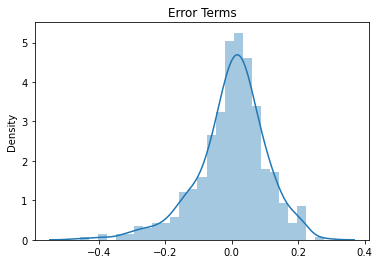

In [50]:
# Let's calculate the residuals and verify the distribution

res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error Terms')

**Findings** : From above distribution plot we can see that the residuals are normally distributed with 0 mean

#### Error terms are independent of each other

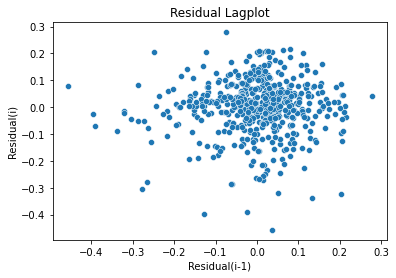

In [51]:
# Let's create a lagged dataset for residuals and corresponding residual lag plot

values = pd.DataFrame(res.values)
res_df = pd.concat([values.shift(1), values], axis=1)
res_df.columns = ['t-1', 't']

# Lagplot
sns.scatterplot(res_df['t-1'], res_df['t'])
plt.xlabel('Residual(i-1)')
plt.ylabel('Residual(i)')
plt.title('Residual Lagplot')
plt.show()

**Findings**: From above residual plot we can see that it doesn't follow a particular trend i.e. Residuals are not dependent on previous values

#### Error terms have constant variance (Homoscedasticity)

Text(0.5, 1.0, 'y_train vs y_train_pred')

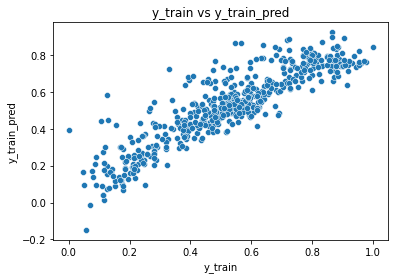

In [52]:
# Plotting y_train and y_train_pred to understand the spread.

sns.scatterplot(y_train, y_train_pred)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.title('y_train vs y_train_pred')

**Findings**: From above plot we can conclude that variance is contant across the spread

#### No Multicollinearity between predictor variables

In [53]:
# Let's check for the multicollinearity using vif
vif

,Features,VIF
2,atemp,3.84
3,windspeed,3.32
0,yr,1.99
4,season_2,1.60
5,season_4,1.33
6,mnth_9,1.20
7,weathersit_3,1.07
1,holiday,1.03


**Findings**: From above VIF matrix we can say that there is no multicollinearity existing between the predictor variables since VIF for all the variables are with in the permissible range of 5

### Model Prediction and Evaluation


#### Model Prediction

In [54]:
# Applying the scaling on the test sets

tst_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_test[tst_vars] = scaler.transform(bike_test[tst_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
299,0,0,1,0.511964,0.496145,0.798722,0.361537,0.309036,0,0,...,0,0,0,0,0,1,0,0,1,0
723,1,1,0,0.289300,0.282736,0.698870,0.301676,0.116137,0,0,...,0,1,0,1,0,0,0,0,1,0
647,1,0,1,0.566998,0.556652,0.566027,0.341041,0.898746,0,0,...,0,0,0,0,1,0,0,0,0,0
520,1,0,1,0.600225,0.586515,0.543663,0.385888,0.817884,1,0,...,0,0,0,1,0,0,0,0,1,0
114,0,0,1,0.682257,0.650319,0.752396,0.335912,0.474745,1,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
# Let's computes a summary of statistics pertaining to the test data

bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.472727,0.031818,0.700000,0.544892,0.518259,0.565274,0.355580,0.526089,0.250,0.268182,...,0.100000,0.081818,0.140909,0.154545,0.159091,0.104545,0.172727,0.113636,0.359091,0.027273
std,0.500394,0.175916,0.459303,0.227155,0.214264,0.186573,0.153069,0.226430,0.434,0.444023,...,0.300684,0.274713,0.348721,0.362295,0.366595,0.306665,0.378873,0.318093,0.480828,0.163248
min,0.000000,0.000000,0.000000,0.047675,0.048706,-0.240150,0.050010,0.068323,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.350497,0.325863,0.423323,0.249373,0.342435,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.565959,0.556655,0.552449,0.342739,0.537912,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743521,0.695084,0.697018,0.434205,0.701131,0.250,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.970925,0.980934,1.002662,0.864144,1.018634,1.000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Dividing into X_test and y_test

y_test = bike_test.pop('cnt')
X_test = bike_test

In [57]:
# Extracting the test data for the columns which model has concluded

X_test = X_test[X_train_new.columns]

In [58]:
# Adding a constant variable 

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,atemp,windspeed,season_2,season_4,mnth_9,weathersit_3
299,1.0,0,0,0.496145,0.361537,0,1,0,0
723,1.0,1,1,0.282736,0.301676,0,0,0,0
647,1.0,1,0,0.556652,0.341041,0,1,0,0
520,1.0,1,0,0.586515,0.385888,1,0,0,0
114,1.0,0,0,0.650319,0.335912,1,0,0,0


In [59]:
# Making the test prediction

y_test_pred = lr_model1.predict(X_test_sm)

#### Model Evaluation

Text(0.5, 1.0, 'y_test vs y_test_pred')

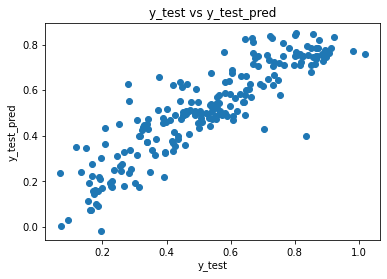

In [60]:
# Plotting y_test and y_test_pred to understand the spread.

plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('y_test vs y_test_pred')

#### Calculating r-squared value for test data set

In [61]:
r2 = round(r2_score(y_test, y_test_pred), 3)
r2

0.789

#### Calculating adjusted_r2 value for test data set

In [62]:
# Number of records
N = len(y_test)
# Number of predictor variables
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(N-1)/(N-p-1)
adjusted_r2

0.781

#### Conclusion - Train vs Test data set

R-Squared and Adjusted R-sqaured values calculated based on the model we created

**Training data**:

r2 = 0.789,
adjusted_r2 = 0.786

**Test data**:

r2 = 0.789,
adjusted_r2 = 0.781

**We can come to the conclusion that it is a good model as there is not much difference in adjusted R-squared value of training and test data set**

### Final Report

Based on the model we created finally below are the top 3 features which are contributing significantly towards explaining the demand of the shared bikes.

**1. Feeling Temperature (atemp)**:
   A coefficient value of 0.6177 indicates that a unit increase in feeling temperature increases the demand of shared bike by    0.6177 units
   
**2. Weather Condition-3 (weathersit_3)**: 
   A coefficient value of -0.2662 indicates that a unit increase in weathersit_3 decreases the demand of shared bike by 0.2662 units
   
**3. Year (yr)**: 
   A coefficient value of 0.2381 indicates that a unit increase in yr variable increases the demand of shared bike by 0.2381 units